In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read Dataset
data = pd.read_excel('Data Kimia Air Mas Tyo.xlsx')

In [3]:
data

,Titik Sumur,El.MAT (m),pH,EC (µs/cm),TDS (ppm),Klorida (Cl-) (mg/lt),Klorinitas (‰),Salinitas (‰),Tingkat Salinitas
0,SM-11,6.00,5.71,1287.33,640.33,95.8,0.0958,0.174069,Fresh water
1,SM-14,7.35,5.72,1169.67,582.33,68.0,0.0680,0.123556,Fresh water
2,SM-34,12.30,5.84,313.00,156.00,12.9,0.0129,0.023439,Fresh water
3,SM-38,11.40,5.40,314.33,156.67,12.4,0.0124,0.022531,Fresh water
4,SM-66,12.90,5.14,453.33,225.67,33.3,0.0333,0.060506,Fresh water
5,SM-69,10.95,6.12,311.67,155.33,7.4,0.0074,0.013446,Fresh water


In [4]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Titik Sumur            6 non-null      object 
 1   El.MAT (m)             6 non-null      float64
 2   pH                     6 non-null      float64
 3   EC (µs/cm)             6 non-null      float64
 4   TDS (ppm)              6 non-null      float64
 5   Klorida (Cl-) (mg/lt)  6 non-null      float64
 6   Klorinitas (‰)         6 non-null      float64
 7   Salinitas (‰)          6 non-null      float64
 8   Tingkat Salinitas      6 non-null      object 
dtypes: float64(7), object(2)
memory usage: 560.0+ bytes


In [5]:
# Rename columns
data.rename(columns = {'El.MAT (m)':'WGL (m)', 'Titik Sumur':'Well ID', 'Klorida (Cl-) (mg/lt)':'Chloride (Cl-) (mg/lt)', 'Klorinitas (‰)':'Chlorinity (‰)', 'Salinitas (‰)':'Salinity (‰)', 'Tingkat Salinitas':'Salinity Level'}, inplace = True)

In [6]:
# Descriptive Statistics
data.describe()

,WGL (m),pH,EC (µs/cm),TDS (ppm),Chloride (Cl-) (mg/lt),Chlorinity (‰),Salinity (‰)
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,10.150000,5.655000,641.555000,319.388333,38.300000,0.038300,0.069591
std,2.808914,0.342914,459.392677,228.478944,36.011443,0.036011,0.065433
min,6.000000,5.140000,311.670000,155.330000,7.400000,0.007400,0.013446
25%,8.250000,5.477500,313.332500,156.167500,12.525000,0.012525,0.022758
50%,11.175000,5.715000,383.830000,191.170000,23.100000,0.023100,0.041973
75%,12.075000,5.810000,990.585000,493.165000,59.325000,0.059325,0.107794
max,12.900000,6.120000,1287.330000,640.330000,95.800000,0.095800,0.174069


In [7]:
# Assign descriptive statistic to data2
data2 = data.describe()
data2

,WGL (m),pH,EC (µs/cm),TDS (ppm),Chloride (Cl-) (mg/lt),Chlorinity (‰),Salinity (‰)
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,10.150000,5.655000,641.555000,319.388333,38.300000,0.038300,0.069591
std,2.808914,0.342914,459.392677,228.478944,36.011443,0.036011,0.065433
min,6.000000,5.140000,311.670000,155.330000,7.400000,0.007400,0.013446
25%,8.250000,5.477500,313.332500,156.167500,12.525000,0.012525,0.022758
50%,11.175000,5.715000,383.830000,191.170000,23.100000,0.023100,0.041973
75%,12.075000,5.810000,990.585000,493.165000,59.325000,0.059325,0.107794
max,12.900000,6.120000,1287.330000,640.330000,95.800000,0.095800,0.174069


In [8]:
# Export statdesc dataset
data2.to_excel("statdesc.xlsx")

C:\Users\danie\AppData\Local\Temp\ipykernel_20352\1796478311.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


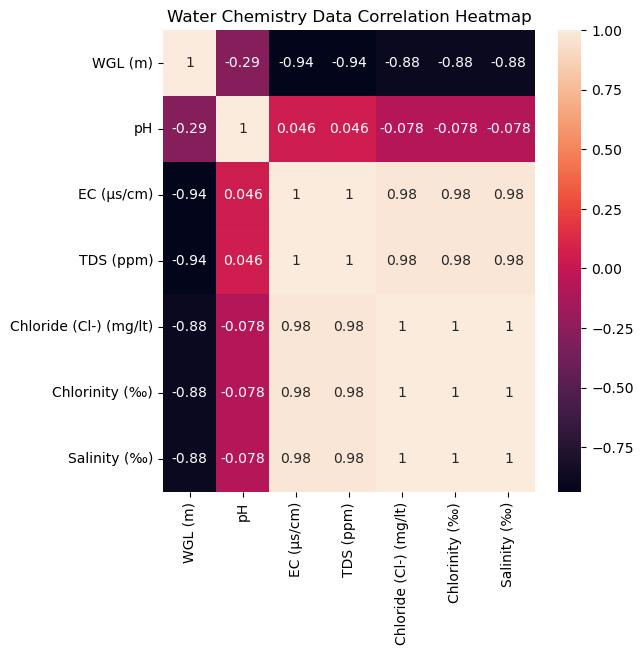

In [9]:
# Heatmap Visualization
plt.figure(figsize=(6, 6))
plt.title('Water Chemistry Data Correlation Heatmap')
sns.heatmap(data.corr(), annot=True)
plt.show()

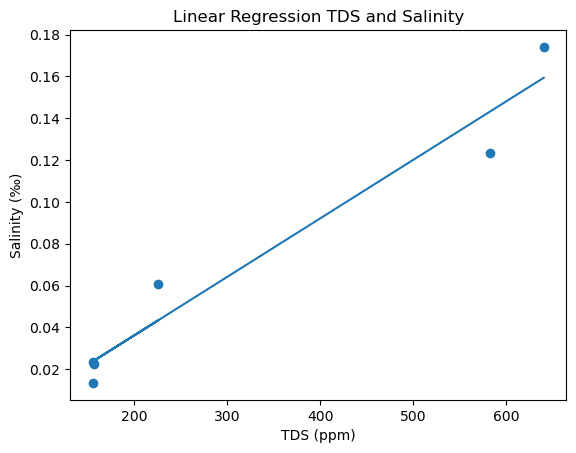

Relationship between TDS and Salinity (R):  0.9763412023025541


In [10]:
# Make Linear Regression Machine learning
x = data["TDS (ppm)"]
y = data["Salinity (‰)"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression TDS and Salinity')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('TDS (ppm)', size=10)
plt.ylabel('Salinity (‰)', size=10)
plt.show()

print('Relationship between TDS and Salinity (R): ', r)